**Covid-19 Sentiment Analysis**

**Context**

I collect recent tweets about the COVID-19 vaccines used in entire world on large scale, as following:

- Pfizer/BioNTech;
- Sinopharm;
- Sinovac;
- Moderna;
- Oxford/AstraZeneca;
- Covaxin;
- Sputnik V.

**Data collection**

The data is collected using tweepy Python package to access Twitter API. For each of the vaccine I use relevant search term (most frequently used in Twitter to refer to the respective vaccine)

**Data collection frequency**

Initial data was merged from tweets about Pfizer/BioNTech vaccine. I added then tweets from Sinopharm, Sinovac (both Chinese-produced vaccines), Moderna, Oxford/Astra-Zeneca, Covaxin and Sputnik V vaccines. The collection was in the first days twice a day, until I identified approximatively the new tweets quota and then collection (for all vaccines) stabilized at once a day, during morning hours (GMT).

**Inspiration**

You can perform multiple operations on the vaccines tweets. Here are few possible suggestions:

- Study the subjects of recent tweets about the vaccine made by various producers;
- Perform various NLP tasks on this data source (topic modelling, sentiment analysis);
- Using the COVID-19 World Vaccination Progress (where we can see the progress of the vaccinations and the countries where the vaccines are administered), you can study the relationship between the vaccination progress and the discussions in social media (from the tweets) about the vaccines.



*Kaggle Dataset*
- https://www.kaggle.com/c/tweet-sentiment-extraction

- https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets



---
**Load Packages**

In [5]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import nltk #https://www.nltk.org/
from nltk.sentiment import SentimentIntensityAnalyzer #https://www.nltk.org/api/nltk.sentiment.html
from textblob import TextBlob #https://textblob.readthedocs.io/en/dev/
from wordcloud import WordCloud, STOPWORDS #https://pypi.org/project/wordcloud/
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Load the Dataset vaccination_all_tweets.csv 

In [1]:
from google.colab import files
up = files.upload()


Saving vaccination_all_tweets.csv to vaccination_all_tweets.csv


In [8]:
tweets_df = pd.read_csv('vaccination_all_tweets.csv')
tweets_df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [8]:
print(f'The Dataset shape is:',tweets_df.shape)

The Dataset shape is: (56585, 16)


So we have 56585 rows and 16 columns

In [9]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56585 entries, 0 to 56584
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                56585 non-null  int64 
 1   user_name         56585 non-null  object
 2   user_location     43499 non-null  object
 3   user_description  52698 non-null  object
 4   user_created      56585 non-null  object
 5   user_followers    56585 non-null  int64 
 6   user_friends      56585 non-null  int64 
 7   user_favourites   56585 non-null  int64 
 8   user_verified     56585 non-null  bool  
 9   date              56585 non-null  object
 10  text              56585 non-null  object
 11  hashtags          44347 non-null  object
 12  source            56460 non-null  object
 13  retweets          56585 non-null  int64 
 14  favorites         56585 non-null  int64 
 15  is_retweet        56585 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 6.2+ MB


In [10]:
tweets_df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,5.658500e+04,5.658500e+04,56585.000000,5.658500e+04,56585.000000,56585.000000
mean,1.369533e+18,1.007127e+05,1306.046037,1.568134e+04,3.089547,13.585827
std,9.728607e+15,8.379072e+05,6017.296036,4.371546e+04,51.458322,200.297695
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.365251e+18,1.150000e+02,145.000000,3.630000e+02,0.000000,0.000000
50%,1.371342e+18,5.510000e+02,413.000000,2.222000e+03,0.000000,1.000000
75%,1.377255e+18,2.565000e+03,1197.000000,1.156500e+04,1.000000,3.000000
max,1.381857e+18,1.497539e+07,516808.000000,1.220826e+06,7695.000000,22815.000000


In [18]:
#Lets find out the mising data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))


In [19]:
missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,0,13086,3887,0,0,0,0,0,0,0,12238,125,0,0,0
Percent,0,0,23.1263,6.86931,0,0,0,0,0,0,0,21.6276,0.220907,0,0,0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


In [31]:
#Unique values
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [30]:
unique_values(tweets_df)


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,56585,56585,43499,52698,56585,56585,56585,56585,56585,56585,56585,44347,56460,56585,56585,56585
Uniques,56585,30809,10872,29633,31244,10883,5618,19398,2,55986,56517,20112,187,267,566,1


Most frequent values

In [32]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [33]:
most_frequent_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,56585,56585,43499,52698,56585,56585,56585,56585,56585,56585,56585,44347,56460,56585,56585,56585
Most frequent item,1364449897190027270,Workout Solutions,India,George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,0,0,0,False,2021-03-02 23:02:10,BREAKING NEWS : #SputnikV approved for emerge...,['Moderna'],Twitter Web App,0,0,False
Frequence,1,1371,1741,1371,1371,411,605,800,50590,4,6,2926,17691,37863,24101,56585
Percent from total,0.002,2.423,4.002,2.602,2.423,0.726,1.069,1.414,89.405,0.007,0.011,6.598,31.334,66.913,42.593,100


Visualize the Data Distribution 

In [9]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()  

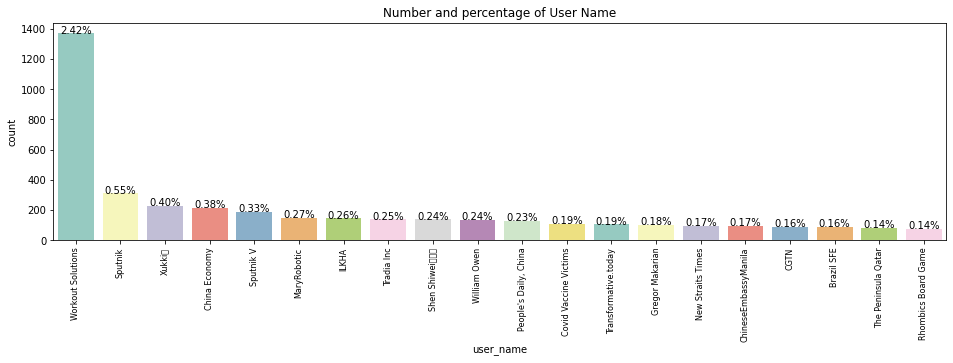

In [10]:
# User Name
plot_count('user_name' , "User Name" , tweets_df , 4)

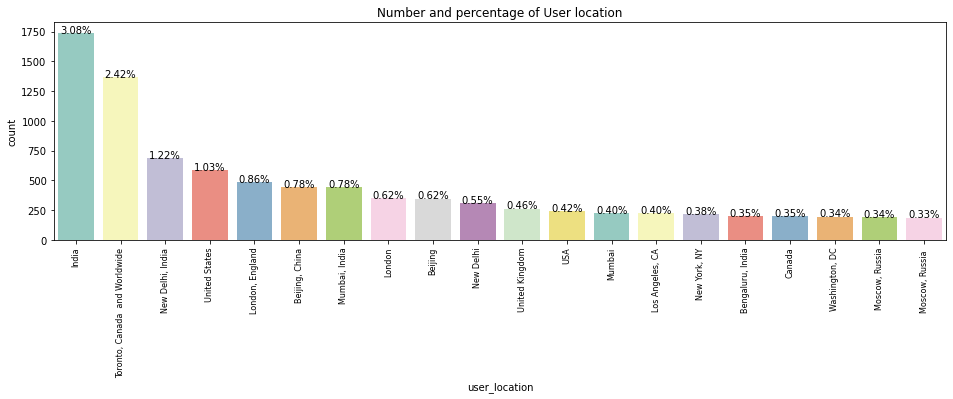

In [11]:
# User Location
plot_count("user_location", "User location", tweets_df,4)

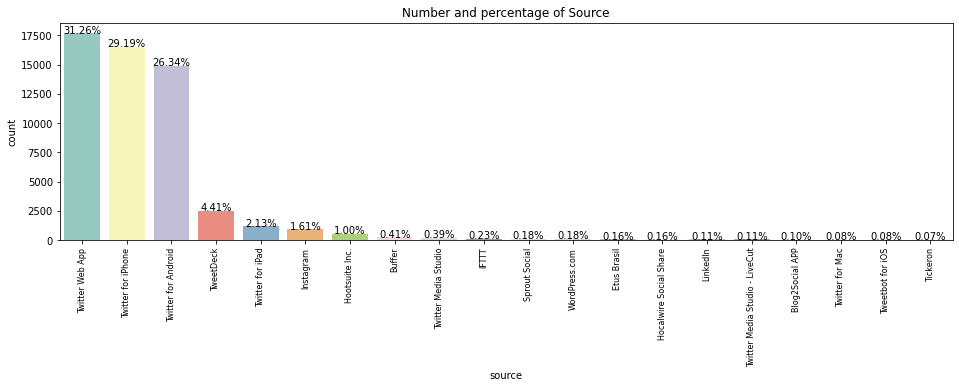

In [12]:
#Tweet Source 
plot_count("source", "Source", tweets_df,4)

In [13]:
#Make a word Cloud from dataset
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [15]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

Text Word Clouds

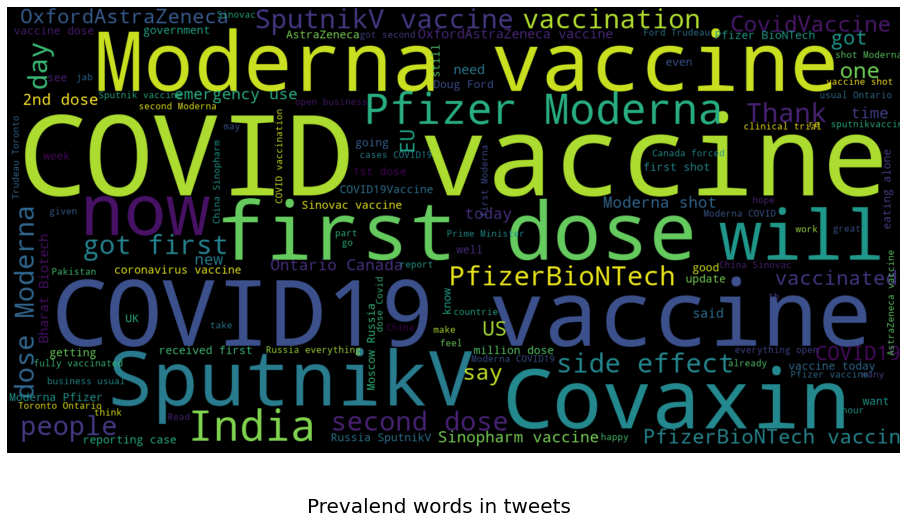

In [16]:
show_wordcloud(tweets_df['text'] , title = 'Prevalend words in tweets')

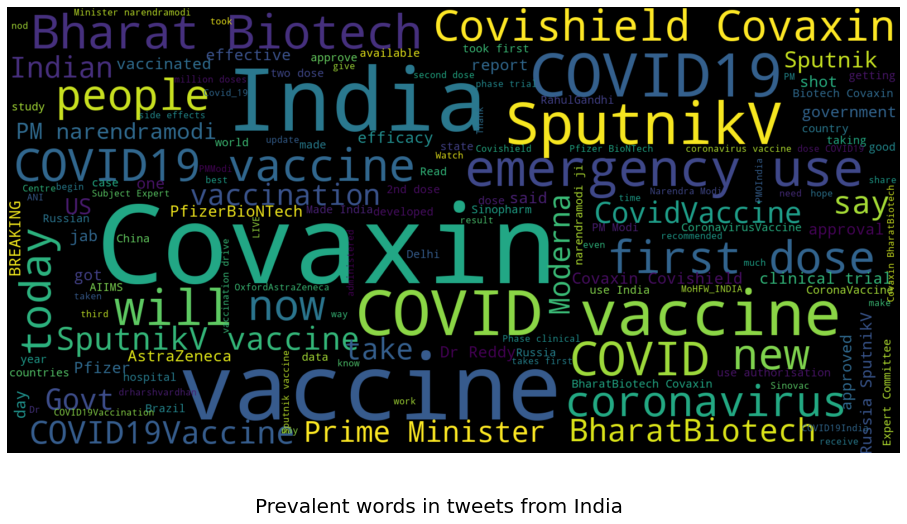

In [17]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

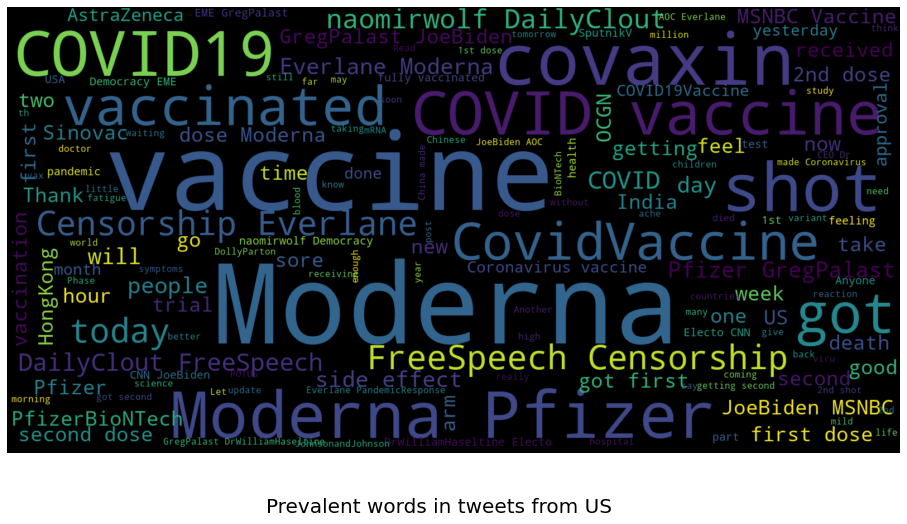

In [18]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

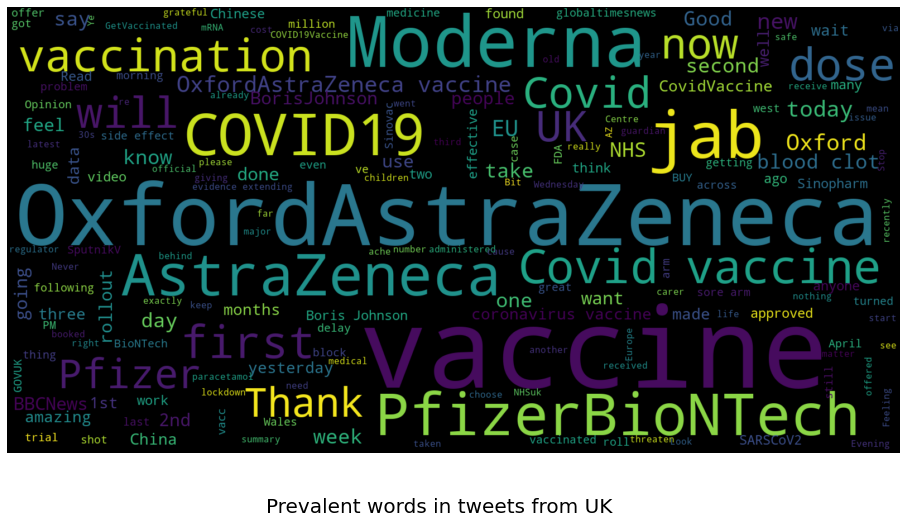

In [19]:
uk_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from UK')

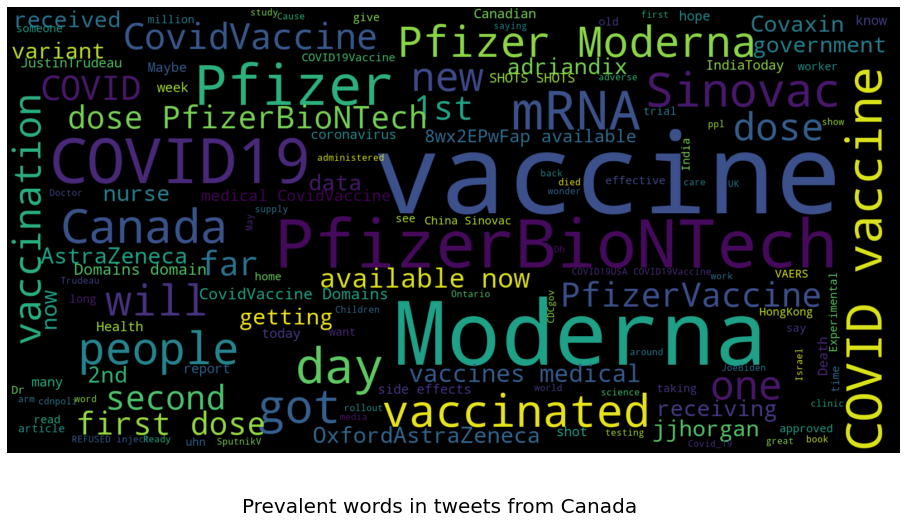

In [20]:
ca_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(ca_df['text'], title = 'Prevalent words in tweets from Canada')